In [1]:
%matplotlib notebook
import numpy as np
import os
import gyrationZMagnet as gzm
from my_tools import get_next_name
import matplotlib.pyplot as plt
import re
import ROOT
from collections import defaultdict

Welcome to JupyROOT 6.20/02


In [2]:
loadpath = f'{gzm.savepath}smeared/'

In [3]:
pattern = 'rejOut_(\d*)_nonSmearedr_01\.csv'

In [4]:
files = [i for i in os.listdir(loadpath) if re.match(pattern,i)]

In [5]:
# files

### A single data file contains data from protons launched at the detector at a random small angle (to pass through both ends) at a single momentum. Each simulation data point (there's ~10 per file) has been smeared 1000 times and put into the file (with some outliers removed).

In [25]:
nbins = 250
sigmas = []
mpvs = []
moments = []
chi2 = []
momenta = []
f = ROOT.TFile(get_next_name('myhists.root'), 'CREATE')
for thisfile in files:
    data = np.loadtxt(f'{loadpath}{thisfile}')
    d = defaultdict(list)
    for key, val in data:
        d[key].append(val)
    for key in d.keys():
        dist_radii = np.array(d[key])
        y,bin_edges = np.histogram(dist_radii,bins=nbins)
        x = (bin_edges[1:]+bin_edges[:-1])/2
        # nbins = int(dist_radii.max()//1+1)

        h = ROOT.TH1D(f'HistTransverseMomentum_{key:.2f}MeV',\
                      f"Distribution of smeared reconstructed gyration radius, transverse momentum {key:.2f};Reconstructed radius [mm];;;",\
                      nbins,dist_radii.min(),dist_radii.max())

        h.FillN(dist_radii.shape[0],dist_radii, np.ones_like(dist_radii))

        f1 = ROOT.TF1('f1','landau',dist_radii.min(),dist_radii.max())
        f1.FixParameter(3,True)
        fitresult = h.Fit('f1','S')

        moments.append(np.sqrt(ROOT.Math.landau_xm2(dist_radii.max(),f1.GetParameter(2),f1.GetParameter(1))))
        sigmas.append(f1.GetParameter(2))
        mpvs.append(f1.GetParameter(1))
        chi2.append(fitresult.Chi2())
        momenta.append(key)
#         h.Write()
        fitresult.Write(f'{key:.2f}_fit')
        f.Write()
f.Close()

np.savetxt('sigmas.csv',np.array(sigmas))
np.savetxt('mpvs.csv',np.array(mpvs))
np.savetxt('moments.csv',np.array(moments))
np.savetxt('chi2.csv',np.array(chi2))
np.savetxt('momenta.csv',np.array(momenta))

 FCN=58.5416 FROM MIGRAD    STATUS=CONVERGED     153 CALLS         154 TOTAL
                     EDM=1.05679e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.19762e+02   2.43140e+01   6.39181e-02  -2.08944e-05
   2  MPV          1.46295e+02   1.49362e+00   5.26034e-03   1.96783e-04
   3  Sigma        2.07078e+01   7.45294e-01   1.25745e-05  -7.27448e-02
 FCN=67.7175 FROM MIGRAD    STATUS=CONVERGED     134 CALLS         135 TOTAL
                     EDM=5.0903e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.30035e+02   1.11244e+01  -3.95201e-02   5.41985e-05
   2  MPV          1.29952e+02   1.31191e+00  -4.39537e-03   2.51227e-05
   3  Sigma        1.

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


In [15]:
plt.figure(1)
plt.hist(sigmas,bins=500)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


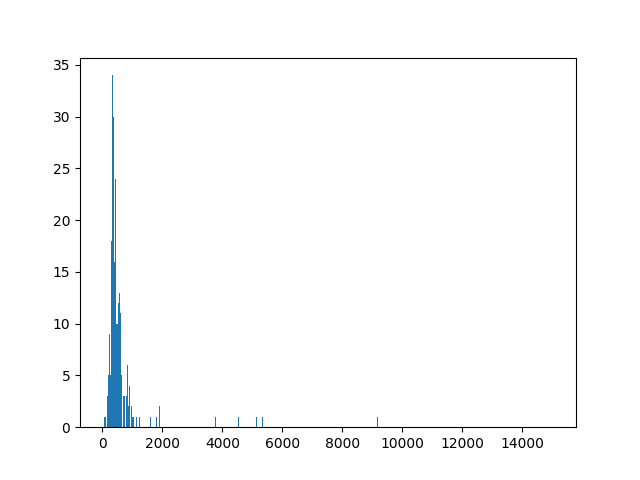

In [14]:
plt.figure(2)
plt.hist(moments,bins=500)
plt.show()

<IPython.core.display.Javascript object>


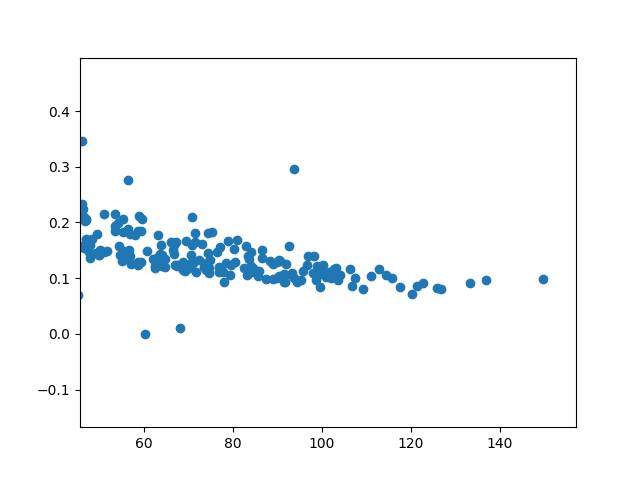

In [27]:
plt.figure(3)
plt.plot(momenta,np.array(sigmas)/np.array(mpvs),'o')

In [29]:
plt.figure(4)
plt.plot(momenta,np.array(moments)/np.array(mpvs),'o')

OSError: [Errno 24] Too many open files: '/home/tsrunchev/.local/lib/python3.6/site-packages/matplotlib/backends/web_backend/js/mpl.js'